# BIMM143: Project 3 by Alyssa Ilano

## Scientific Question: Which farm animals (chickens, cows, pigs, sheep) that maintain close and frequent contact with humans are more likely to be infected with SARS-CoV-2, and ultimately spread it to their owners?
SARS-CoV-2 is a novel coronavirus that has had a large impact on society in the last year. Much about it is still not known, and we're still learning about it every day. It's of great concern whether or not it can affect organisms besides humans, especially those that we rely on as sources of food products.

I added the horse sequence just for fun and will perform the same analysis, but more on that later.

## Scientific Hypothesis: If one animal was more likely to first be infected with SARS-CoV-2, and then spread it to a human, then its ACE2 receptor sequences should be similar to those of humans.
The ACE2 sequence codes for the angiotensin-converting enzyme found on the surface of human cells. This is what the SARS-CoV-2 spike (S) protein binds to when it enters cells, to eventually replicate and spread through the body. If an animal has low susceptibility to infection, this would mean that it’s highly unlikely that a particular animal could infect a human since it wouldn’t be infected in the first place. Vice versa, high susceptibility would make it more likely for that animal to be able to infect humans. However, this script only contains a basic analysis and can't guarantee all of this, necessarily--which I'll expand on below.

This script has multiple parts that use different types of analysis of protein sequences pulled from NCBI, as well as protein model coordinates from swissmodel.expasy.org to come to a conclusion. The analyses performed include: calculating alignment scores of each alignment done between the human ACE2 and farm animal protein sequences, clustering analysis represented by a phylogenetic tree from ClustalOmega, and modelling of the proteins to compare their structure.

### Part 1: Import packages

NumPy: adds functionality to work with large, high-dimensional data structures like matrices, arrays, etc; BioPython: module that includes support for biological data, like DNA sequences; IPython: includes toolkit to work interactively with Python; PyMol: molecular graphics viewer and constructor that helps generate visualizations of molecules

In [107]:
import numpy as np

import matplotlib.pyplot as plt

import Bio
from Bio import SeqIO
from Bio import Align
from Bio.Seq import Seq
from Bio.Cluster import kcluster

from IPython.display import Image

import pymol
from pymol import cmd

### Part 2: Extract data from file and compile into dictionary - protein sequences
SeqIO has a method parse() that takes in a file name as well as the file format. It returns an iterator that goes through the entire file, making each record (aka all the information accompanying a certain sequence) accessible to the user.

In [78]:
# Initialize empty lists
pseq_list = []
pspecies_list = []
descr_list = [] # Save for future use
    
# Iterate through file (pulled from NCBI) to get species names and respective protein sequences    
for record in SeqIO.parse('ace2proteins.fasta', 'fasta'):
    
    # Extract protein sequences and add to empty list: seq_list
    ace2_seq = record.seq # get ACE2 sequence
    pseq_list.append(ace2_seq) # add to empty list
    
    # Extract species names and add to empty list: species_list
    descr = record.description 
    descr_list.append(descr)
    start = descr.find('[') 
    end = descr.find(']')
    species = descr[start + 1: end] # Create substring of description to strip it down to species name only
    pspecies_list.append(species)
    
# Create dictionary with species:seq value pairs
pace2_dict = dict(zip(pspecies_list, pseq_list))

# Assign values to variables to access later on in Part 3
human_pseq = pace2_dict['Homo sapiens']
chicken_pseq = pace2_dict['Gallus gallus']
cow_pseq = pace2_dict['Bos taurus']
pig_pseq = pace2_dict['Sus scrofa']
sheep_pseq = pace2_dict['Ovis aries']
horse_pseq = pace2_dict['Equus caballus']

### Part 3: Perform alignments of protein sequences and compute scores, represented in bar graph
Append scores to list; show scores visually

In [81]:
# Create aligner object
from Bio import Align
aligner = Align.PairwiseAligner()

# Initialize names, non_human sequences, and empty scores lists
alignment_names = ['Chicken', 'Cow', 'Pig', 'Sheep', 'Horse']
animal_seq = [chicken_pseq, cow_pseq, pig_pseq, sheep_pseq, horse_pseq]
scores = []

# Loop through animal_seq list and perform alignments
for seq in animal_seq :
    alignment = aligner.align(human_pseq, seq)
    scores.append(alignment.score) # add score to scores list

# Return list of scores
print(scores)

[561.0, 646.0, 660.0, 663.0, 700.0]


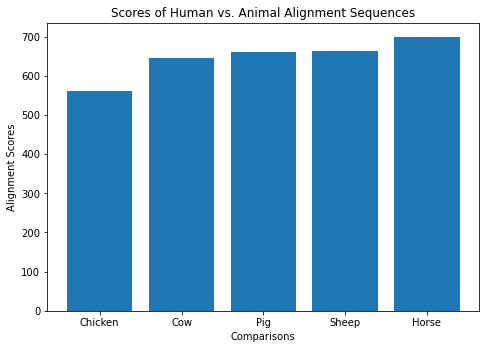

In [82]:
# Visualize scores, percent identity, and percent similarity in bar graphs

score_fig = plt.figure()
ax = score_fig.add_axes([0,0,1,1])
ax.bar(alignment_names, scores)
plt.xlabel('Comparisons')
plt.ylabel('Alignment Scores')
plt.title('Scores of Human vs. Animal Alignment Sequences')
plt.show()

The percent identity of the chicken sequence to the human sequence is: 66%
The percent identity of the cow sequence to the human sequence is: 78%
The percent identity of the pig sequence to the human sequence is: 81%
The percent identity of the sheep sequence to the human sequence is: 82%
The percent identity of the horse sequence to the human sequence is: 87%
The percent similarity of the chicken sequence to the human sequence is: 79%
The percent similarity of the cow sequence to the human sequence is: 87%
The percent similarity of the pig sequence to the human sequence is: 90%
The percent similarity of the sheep sequence to the human sequence is: 90%
The percent similarity of the horse sequence to the human sequence is: 93%


<ipython-input-109-2d383fff85ba>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(alignment_names)


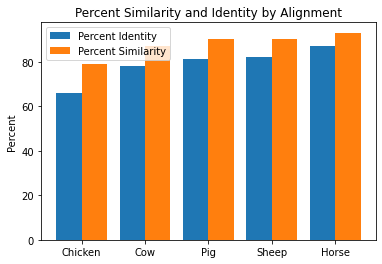

In [109]:
# Visualize percentages taken from inputting sequences into BLAST Alignment utility

# Values of percent identity and similarity
BLAST_percentidentity = [66, 78, 81, 82, 87]
BLAST_percentsimilarity = [79, 87, 90, 90, 93]

# Zip together dictionaries for easy access
p_ident = dict(zip(alignment_names, BLAST_percentidentity))
p_sim = dict(zip(alignment_names, BLAST_percentsimilarity))


# Assign values to format graph
labellocation = np.arange(len(alignment_names))
bar_width = 0.4

# Draw in figure
figure, ax = plt.subplots()
bar1 = ax.bar(labellocation - bar_width/2, BLAST_percentidentity, bar_width, label='Percent Identity')
bar2 = ax.bar(labellocation + bar_width/2, BLAST_percentsimilarity, bar_width, label='Percent Similarity')

# Label aspects of graph
ax.set_xticklabels(alignment_names)
ax.set_ylabel('Percent')
ax.set_title('Percent Similarity and Identity by Alignment')
ax.set_xticks(labellocation)
ax.legend()

# Iterate through dictionaries to print each value in a readable way
for key, val in p_ident.items() :
    print("The percent identity of the " + key.lower() + " sequence to the human sequence is: " + str(val) + "%")

for key, val in p_sim.items() :
    print("The percent similarity of the " + key.lower() + " sequence to the human sequence is: " + str(val) + "%")

# Show figure
plt.show()

### Part 4: Clustering Sequences using a Phylogenetic Tree

#### Phylogenetic Tree
Generate tree from ClustalOmega MSA results to see possible groupings.

NP_001358344.1 angiotensin-converting enzyme 2 isoform 1 precursor [Homo sapiens]
XP_416822.2 angiotensin-converting enzyme 2 [Gallus gallus]
XP_005228485.1 angiotensin-converting enzyme 2 isoform X1 [Bos taurus]
XP_001490241.1 angiotensin-converting enzyme 2 [Equus caballus]
NP_001116542.1 angiotensin-converting enzyme 2 precursor [Sus scrofa]
XP_011961657.1 angiotensin-converting enzyme 2 [Ovis aries]


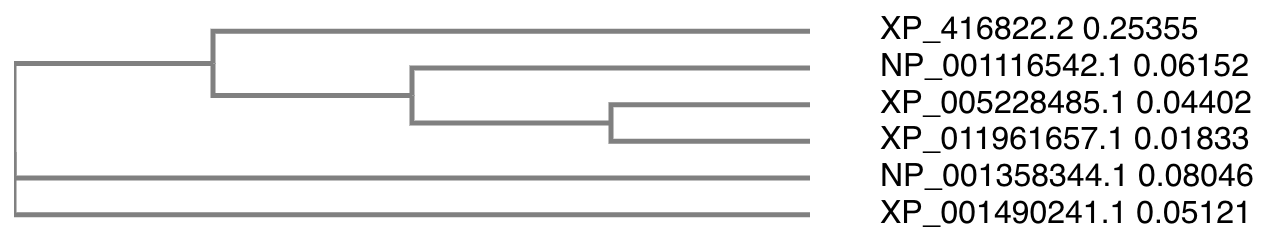

In [110]:
# Iterate through descriptions and print
for des in descr_list :
    print(str(des))

# Display image    
Image(filename='/Users/alyssailano/Desktop/Screen Shot 2021-03-08 at 9.05.58 PM.png')

### Part 5: Protein Visualizations with PyMol
Display ACE2 protein models from https://swissmodel.expasy.org/ using pymol application, in order: human, chicken, cow pig, sheep, horse

#### Human Protein Model

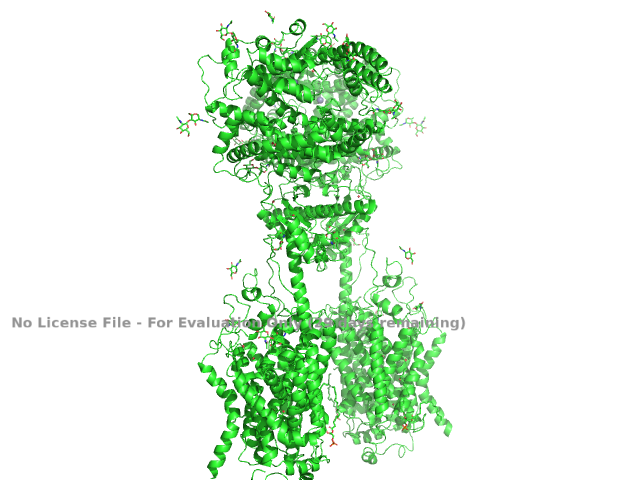

In [111]:
# Display image
Image(filename='/Users/alyssailano/Desktop/bimm143project3/pymol pics/human.png')

#### Chicken Protein Models
Display images of unmarked and marked models

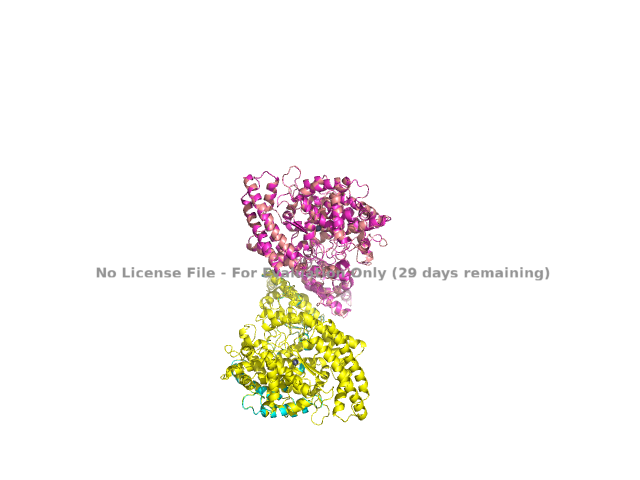

In [86]:
# Unmarked model
Image(filename='/Users/alyssailano/Desktop/bimm143project3/pymol pics/chicken.png')

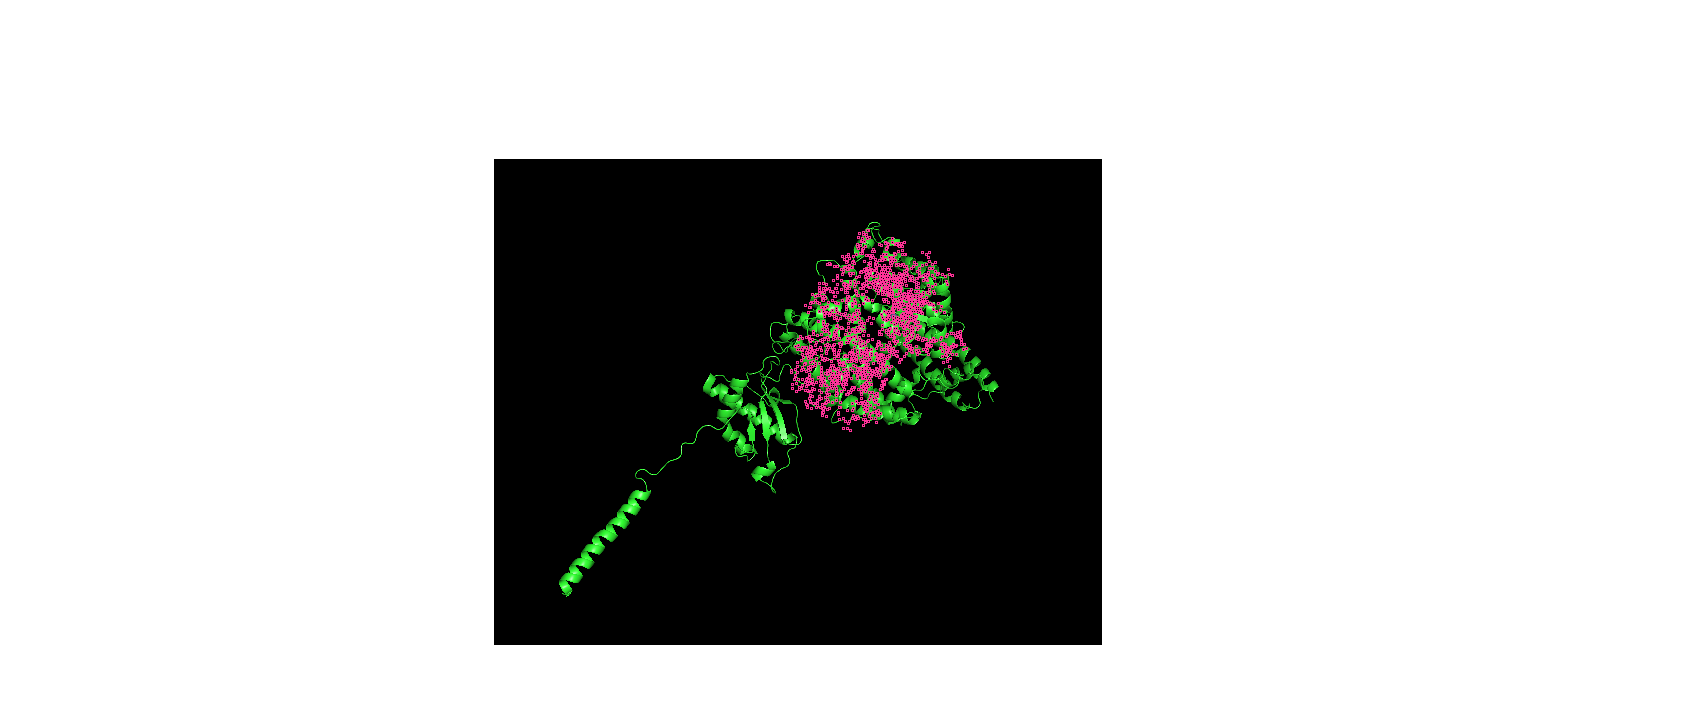

In [87]:
# Model with marked residues similar/equivalent to those of a human in pink
Image(filename='/Users/alyssailano/Desktop/bimm143project3/marked_chicken.png')

#### Cow Protein Models
Display images of unmarked and marked models

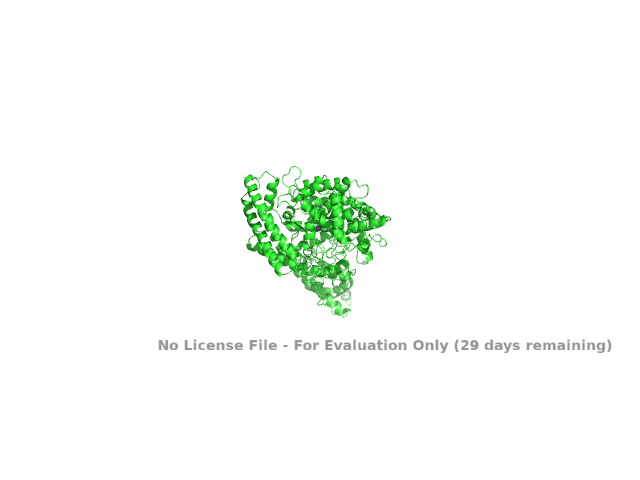

In [88]:
# Unmarked model
Image(filename = '/Users/alyssailano/Desktop/bimm143project3/pymol pics/cow.png')

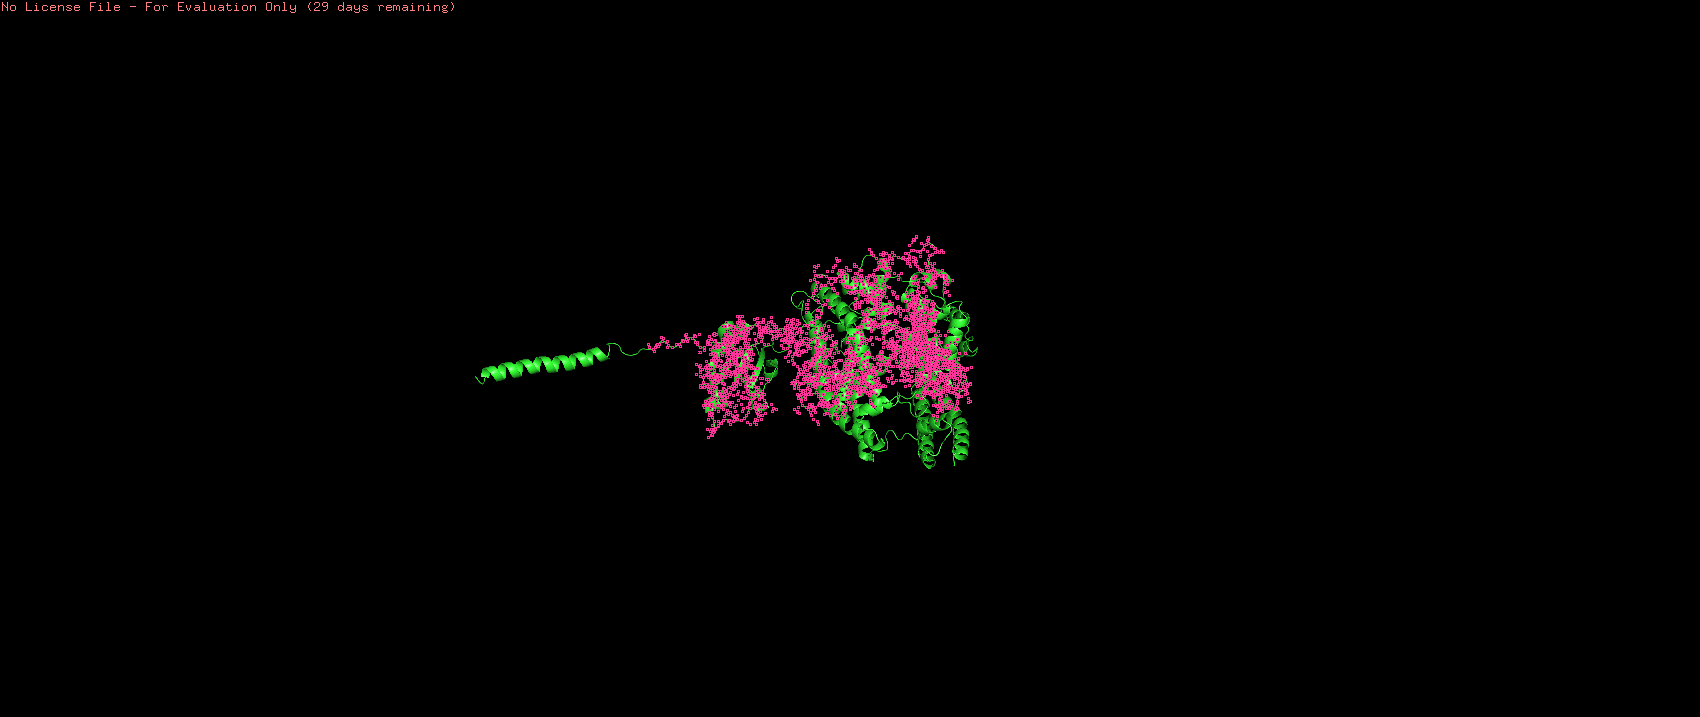

In [89]:
# Model with marked residues similar/equivalent to those of a human in pink
Image(filename = '/Users/alyssailano/Desktop/bimm143project3/marked_cow.png')

#### Pig Protein Models (note: only incomplete coordinates available)
Display images of unmarked and marked models

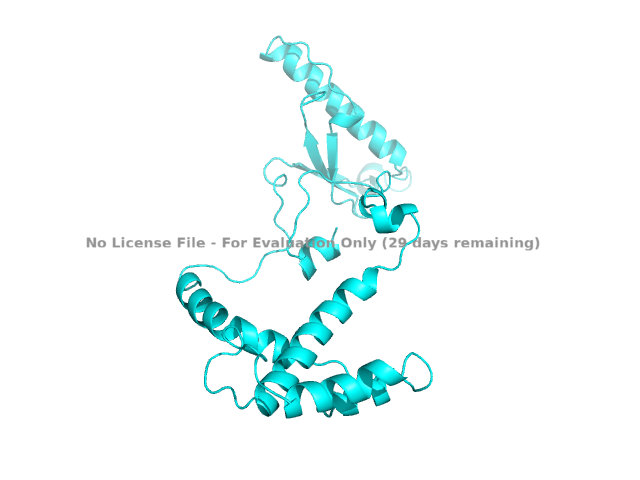

In [90]:
# Unmarked model
Image(filename='/Users/alyssailano/Desktop/bimm143project3/pymol pics/pig.png')

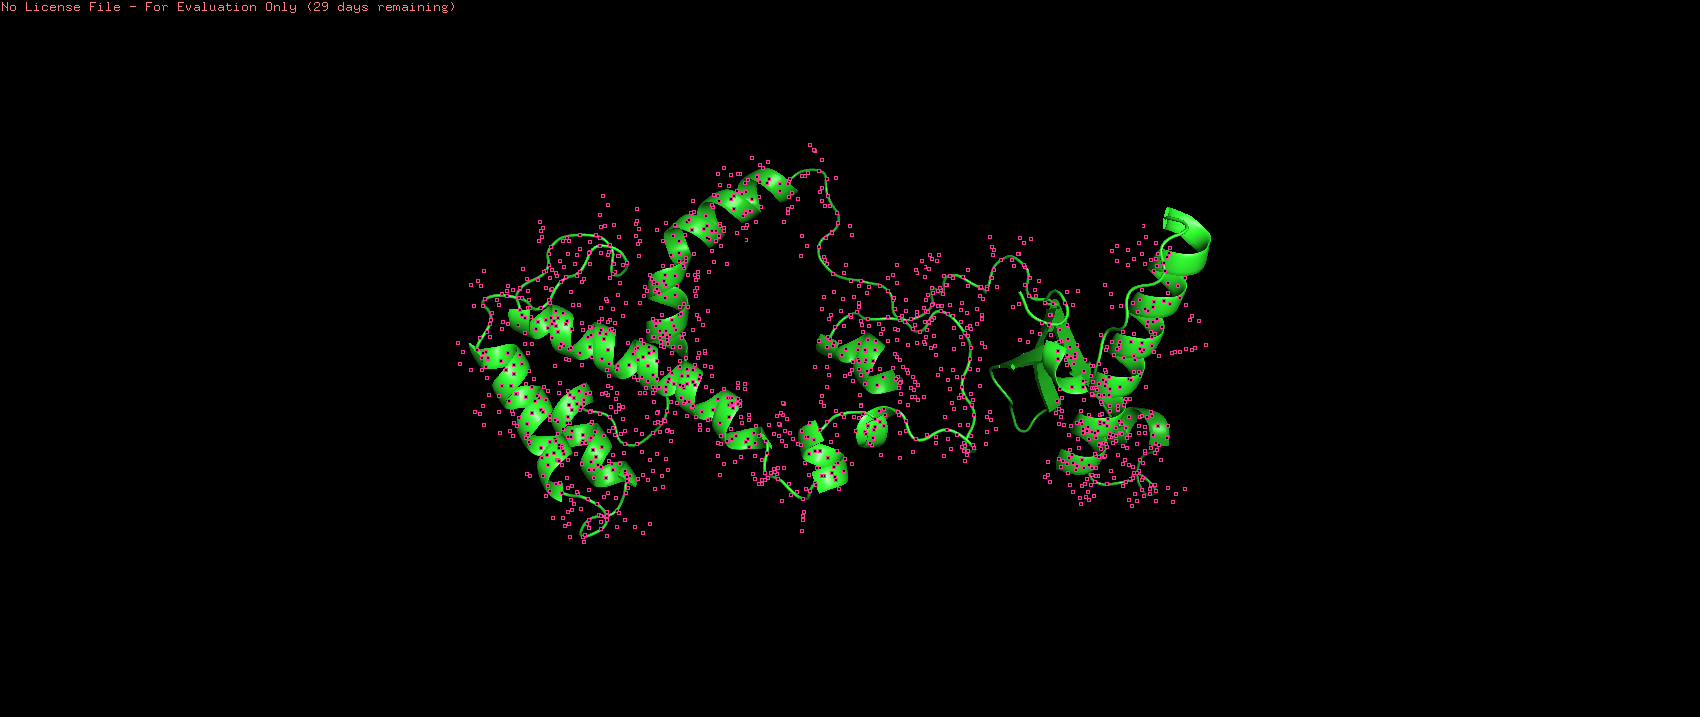

In [91]:
# Model with marked residues similar/equivalent to those of a human in pink
Image(filename='/Users/alyssailano/Desktop/bimm143project3/marked_incomplete_pig.png')

#### Sheep Protein Models
Display images of unmarked and marked models

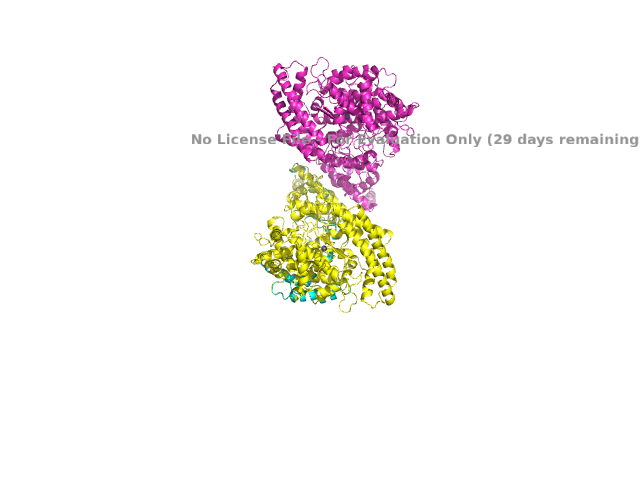

In [92]:
# Unmarked model
from IPython.display import Image
Image(filename='/Users/alyssailano/Desktop/bimm143project3/pymol pics/sheep.png')

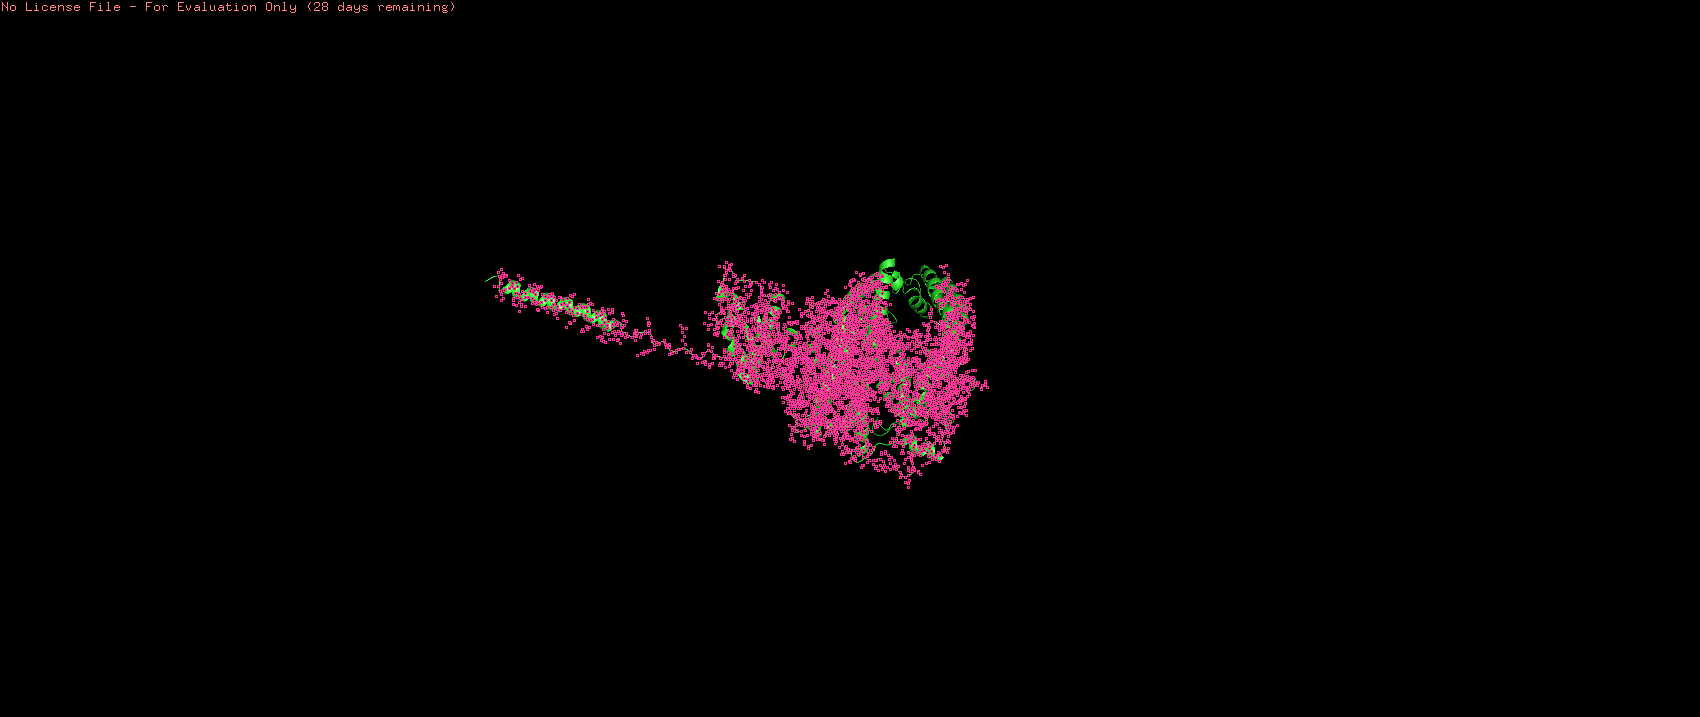

In [93]:
# Model with marked residues similar/equivalent to those of a human in pink
Image(filename='/Users/alyssailano/Desktop/bimm143project3/marked_sheep.png')

#### Horse Protein Models
Display images of unmarked and marked models

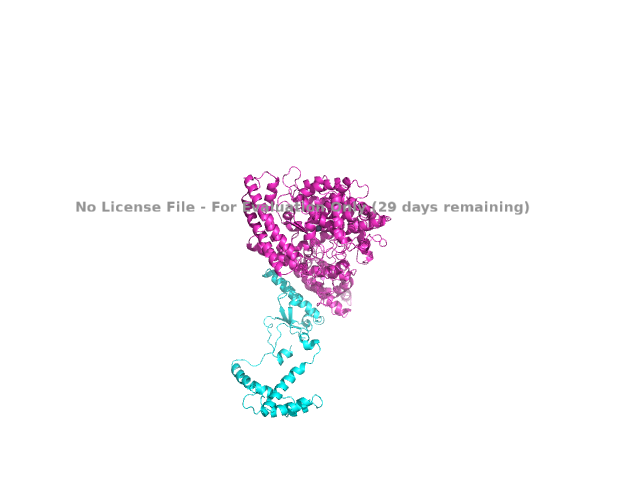

In [94]:
# Unmarked model
Image(filename='/Users/alyssailano/Desktop/bimm143project3/pymol pics/horse.png')

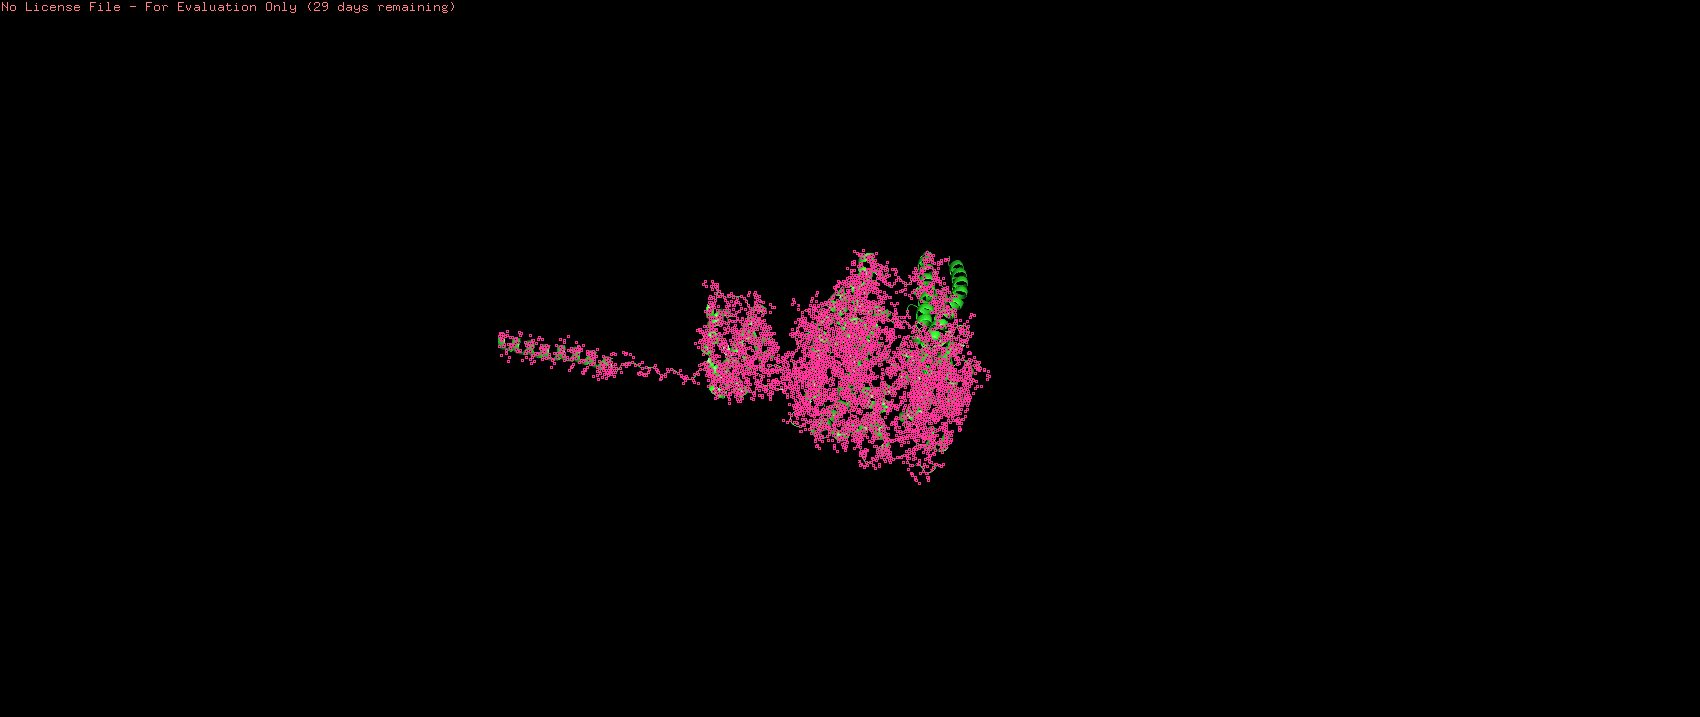

In [95]:
# Model with marked residues similar/equivalent to those of a human in pink
Image(filename='/Users/alyssailano/Desktop/bimm143project3/marked_horse.png')

## Analysis of Results
Discussion of what I found, as well as limitations and pitfalls of my analysis

### Part 3: Scoring, Percent Identity and Similarity
To reiterate, my code was written to calculate the score of human vs. animal sequences, and this is the output:

In [96]:
print(scores)

[561.0, 646.0, 660.0, 663.0, 700.0]


All of my ACE2 sequences had about 800 residues, so, as you can see, these are pretty high. In order from largest to smallest, the horse had the most matches, followed by sheep, pig, cow, and then chicken. Let's look at percent similarity and percent identity next.

In [97]:
print("Percent identities of chicken, cow, pig, sheep, and horse sequences to the human sequence are: " + str(BLAST_percentidentity))
print("Percent similarities of chicken, cow, pig, sheep, and horse sequences to the human sequence are: " + str(BLAST_percentsimilarity))

Percent identities of chicken, cow, pig, sheep, and horse sequences to the human sequence are: [66, 78, 81, 82, 87]
Percent similarities of chicken, cow, pig, sheep, and horse sequences to the human sequence are: [79, 87, 90, 90, 93]


Again, it looks like the horse takes the cake, followed by sheep, pig, cow, and chicken. The order definitely supports the score from above, which is a good sign! This part is looking as though horses might be particularly at risk for SARS-CoV-2 infection, and thus the most likely to pass on SARS-CoV-2 to humans, right? Let's keep going.

### Part 4: Clustering using a Phylogenetic Tree
This analysis was used to look at sequences that might be clustered with that of human ACE2. The phylogenetic tree looks as though the human sequence is just as "related" to the horse sequence, and to the cluster of the other sequences, which are more related to each other. To specify, the cow and sheep sequences are clustered, and this pair is then clustered with the pig sequence, which is then clustered with the chicken sequence. This doesn't really give a clear answer that supports the hypothesis--but it seems as though the horse sequence may not be as closely tied to the human ACE2 sequence as the previous analysis indicates.

NP_001358344.1 angiotensin-converting enzyme 2 isoform 1 precursor [Homo sapiens]
XP_416822.2 angiotensin-converting enzyme 2 [Gallus gallus]
XP_005228485.1 angiotensin-converting enzyme 2 isoform X1 [Bos taurus]
XP_001490241.1 angiotensin-converting enzyme 2 [Equus caballus]
NP_001116542.1 angiotensin-converting enzyme 2 precursor [Sus scrofa]
XP_011961657.1 angiotensin-converting enzyme 2 [Ovis aries]


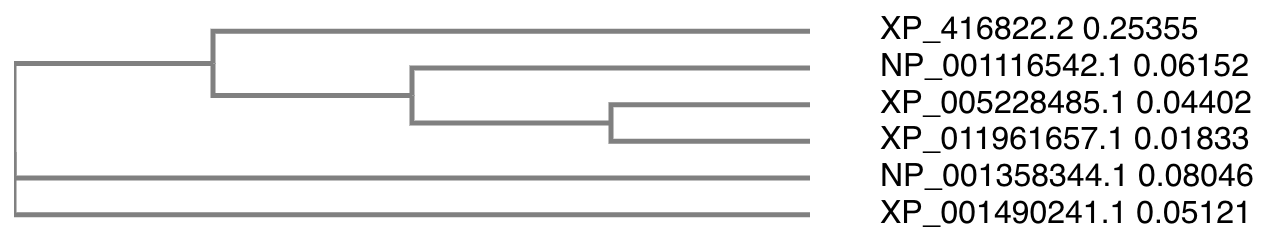

In [98]:
# Print out a key with species names and sequence ID
for des in descr_list :
    print(str(des))

# Print image of tree    
Image(filename='/Users/alyssailano/Desktop/Screen Shot 2021-03-08 at 9.05.58 PM.png')

### Part 5: Protein Visualization
Lastly, this section included molecular models of the proteins that were generated through coordinates pulled from swissmodel.expasy.org. I'm not going to paste them down here again, but the overall level of pink molecules in the marked images, indicating identical residues to the human sequence, increases as you go from chicken, cow, pig, sheep, horse. So, this also supports the results of the calculations from part 3.

Overall, it looks like horses are the clear winner, and might be the organisms most likely to be infected and transmit SARS-CoV-2 to humans.

After looking at my analysis, however, I actually don't agree. I'll explain why below.

### Limitations
The analysis I performed here was very limited in scope. I was comparing proteins with each other, but not how they interact with other molecules--and I think, to properly answer this question, a fair amount of structural and chemical analysis needs to be involved, as well as experimental infection of these animals to see what actually happens.

I disagree with the results suggesting that horses may be more susceptible to the human coronavirus, because there's no absolute way of knowing if a horse could truly be susceptible to SARS-CoV-2 until it gets infected. To this day, there haven't been any reported known cases (2). Not only that, the phylogenetic tree also pointed out that the human and horse sequences equally related as the human sequence is to the other four sequences. This fact points to how important it is to corroborate findings with peer-reviewed literature--as it stands within what's known right now, it looks like sheep may be the most at risk for infection within the group of animals I analyzed above, which is supported by my analysis. (1)

## Sources
1) Lam, S.D., Bordin, N., Waman, V.P. et al. SARS-CoV-2 spike protein predicted to form complexes with host receptor protein orthologues from a broad range of mammals. Sci Rep 10, 16471 (2020). https://doi.org/10.1038/s41598-020-71936-5

2) Ohio State University. “COVID-19 and Animals.” COVID-19 and Animals | College of Veterinary Medicine, Ohio State University, vet.osu.edu/about-us/news/covid-19-and-animals#Horses%20Livestock%20risk%20to%20humans.